In [1]:
import requests
import xml.etree.ElementTree as et
import pandas as pd

url = 'http://cbu.uz/uzc/arkhiv-kursov-valyut/xml/USD/2015-03-26/'
xml_data = requests.get(url).content
root = et.fromstring(xml_data)
required_tag = ['CcyNm_EN','Nominal','Rate','date']

data_dict = {}
for elem in root:
    for el in elem:  
        if el.tag in required_tag:
            data_dict.setdefault(el.tag,[]).append(el.text)

df = pd.DataFrame.from_dict(data_dict)

In [2]:
df

,CcyNm_EN,Nominal,Rate,date
0,U.S. Dollar,1,2484.15,24.03.2015


In [1]:
import datetime
import pandas as pd
import requests
import xml.etree.ElementTree as et

start = datetime.datetime.strptime("2019-01-01", "%Y-%m-%d")
end = datetime.datetime.strptime("2019-02-08", "%Y-%m-%d")
date_generated = [start + datetime.timedelta(days = x) for x in range(0, (end - start).days)]

dates_list = []
for date in date_generated:
    txt = str(str(date.year) + '-' + str(date.month) + '-' + str(date.day))
    dates_list.append(txt)

ndf = pd.DataFrame()  # create empty ndf

for i in range(0, len(dates_list)):
    allURL = 'http://cbu.uz/uzc/arkhiv-kursov-valyut/xml/USD/' + dates_list[i] + '/'
    
    xml_data = requests.get(allURL).content
    root = et.fromstring(xml_data)
    required_tag = ['CcyNm_EN','Nominal','Rate','date']

    data_dict = {}
    for elem in root:
        for el in elem:  
            if el.tag in required_tag:
                data_dict.setdefault(el.tag,[]).append(el.text)

    chunk = pd.DataFrame.from_dict(data_dict)
    ndf = pd.concat([ndf, chunk])
    
print(ndf)

    CcyNm_EN Nominal     Rate        date
0  US Dollar       1  8336.25  01.01.2019
0  US Dollar       1  8336.25  01.01.2019
0  US Dollar       1  8336.25  01.01.2019
0  US Dollar       1  8336.25  01.01.2019
0  US Dollar       1  8336.25  01.01.2019
0  US Dollar       1  8336.25  01.01.2019
0  US Dollar       1  8336.25  01.01.2019
0  US Dollar       1  8337.07  08.01.2019
0  US Dollar       1  8337.07  08.01.2019
0  US Dollar       1  8337.07  08.01.2019
0  US Dollar       1  8337.07  08.01.2019
0  US Dollar       1  8337.07  08.01.2019
0  US Dollar       1  8337.07  08.01.2019
0  US Dollar       1  8337.07  08.01.2019
0  US Dollar       1  8356.18  15.01.2019
0  US Dollar       1  8356.18  15.01.2019
0  US Dollar       1  8356.18  15.01.2019
0  US Dollar       1  8356.18  15.01.2019
0  US Dollar       1  8356.18  15.01.2019
0  US Dollar       1  8356.18  15.01.2019
0  US Dollar       1  8356.18  15.01.2019
0  US Dollar       1  8378.18  22.01.2019
0  US Dollar       1  8378.18  22.

In [2]:
ndf

,CcyNm_EN,Nominal,Rate,date
0,US Dollar,1,8336.25,01.01.2019
0,US Dollar,1,8336.25,01.01.2019
0,US Dollar,1,8336.25,01.01.2019
0,US Dollar,1,8336.25,01.01.2019
0,US Dollar,1,8336.25,01.01.2019
0,US Dollar,1,8336.25,01.01.2019
0,US Dollar,1,8336.25,01.01.2019
0,US Dollar,1,8337.07,08.01.2019
0,US Dollar,1,8337.07,08.01.2019
0,US Dollar,1,8337.07,08.01.2019


In [12]:
import pandas as pd

ndf = pd.DataFrame()  # create empty ndf
allURL = 'http://uzrvb.uz/ru/trades-archive?ExchangeVolatility%%5Btype%%5D=1&ExchangeVolatility%%5Bexchange_tool_id%%5D=1&ExchangeVolatility%%5Bcreated_at%%5D=01-01-2017&ExchangeVolatility%%5Bend_date%%5D=31-12-2018&page=%d'
for k in range(1, 14):
    url = allURL % k
    chunk = pd.read_html(url)[11]
    ndf = pd.concat([ndf, chunk])
ndf.tail()

#uzfx = 'http://uzrvb.uz/ru/trades-archive?ExchangeVolatility%5Btype%5D=1&ExchangeVolatility%5Bexchange_tool_id%5D=1&ExchangeVolatility%5Bcreated_at%5D=01-01-2017&ExchangeVolatility%5Bend_date%5D=08-02-2019&page=3'
#chunk = pd.read_html(uzfx)[11]
#chunk

,Created At,Exchange Tool ID,Exchange,Value
,,Unnamed: 1_level_1,Unnamed: 2_level_1,
3,2018-01-12,USD/SUM_IBTS,8151.0,NaN
4,2018-01-11,USD/SUM_IBTS,8150.0,NaN
5,2018-01-10,USD/SUM_IBTS,8146.0,NaN
6,2018-01-09,USD/SUM_IBTS,8140.0,NaN
7,2018-01-08,USD/SUM_IBTS,8140.0,NaN


In [13]:
ndf.shape

(248, 4)

In [14]:
ndf.columns = ndf.columns.droplevel(-1)
ndf.head()

,Created At,Exchange Tool ID,Exchange,Value
0,2018-12-29,USD/SUM_IBTS,8341.0,10888.0
1,2018-12-28,USD/SUM_IBTS,8348.0,11962.0
2,2018-12-27,USD/SUM_IBTS,8337.0,11582.0
3,2018-12-26,USD/SUM_IBTS,8331.0,7023.0
4,2018-12-25,USD/SUM_IBTS,8335.0,22266.0


In [15]:
ndf.dtypes

Created At           object
Exchange Tool ID     object
Exchange            float64
Value               float64
dtype: object

In [16]:
ndf.columns = ndf.columns.str.replace(' ', '_')
ndf.head()

,Created_At,Exchange_Tool_ID,Exchange,Value
0,2018-12-29,USD/SUM_IBTS,8341.0,10888.0
1,2018-12-28,USD/SUM_IBTS,8348.0,11962.0
2,2018-12-27,USD/SUM_IBTS,8337.0,11582.0
3,2018-12-26,USD/SUM_IBTS,8331.0,7023.0
4,2018-12-25,USD/SUM_IBTS,8335.0,22266.0


In [17]:
ndf['Created_At'] = pd.to_datetime(ndf['Created_At'], format='%Y-%m-%d')
ndf.dtypes

Created_At          datetime64[ns]
Exchange_Tool_ID            object
Exchange                   float64
Value                      float64
dtype: object

In [18]:
ndf.sort_values(by = ['Created_At'], inplace = True, ascending = True)
ndf.head()

,Created_At,Exchange_Tool_ID,Exchange,Value
7,2018-01-08,USD/SUM_IBTS,8140.0,NaN
6,2018-01-09,USD/SUM_IBTS,8140.0,NaN
5,2018-01-10,USD/SUM_IBTS,8146.0,NaN
4,2018-01-11,USD/SUM_IBTS,8150.0,NaN
3,2018-01-12,USD/SUM_IBTS,8151.0,NaN


In [19]:
FX = ndf.set_index('Created_At')
FX.index = pd.to_datetime(FX.index)
FX.head()

,Exchange_Tool_ID,Exchange,Value
Created_At,,,
2018-01-08,USD/SUM_IBTS,8140.0,NaN
2018-01-09,USD/SUM_IBTS,8140.0,NaN
2018-01-10,USD/SUM_IBTS,8146.0,NaN
2018-01-11,USD/SUM_IBTS,8150.0,NaN
2018-01-12,USD/SUM_IBTS,8151.0,NaN


In [20]:
ndf.head()

,Created_At,Exchange_Tool_ID,Exchange,Value
7,2018-01-08,USD/SUM_IBTS,8140.0,NaN
6,2018-01-09,USD/SUM_IBTS,8140.0,NaN
5,2018-01-10,USD/SUM_IBTS,8146.0,NaN
4,2018-01-11,USD/SUM_IBTS,8150.0,NaN
3,2018-01-12,USD/SUM_IBTS,8151.0,NaN


In [25]:
FX.drop(FX.columns[[0, 2]], axis = 1, inplace = True)
FX.head()

,Exchange
Created_At,
2018-01-08,8140.0
2018-01-09,8140.0
2018-01-10,8146.0
2018-01-11,8150.0
2018-01-12,8151.0


Text(0.45,0.7,'Odil Dallol')

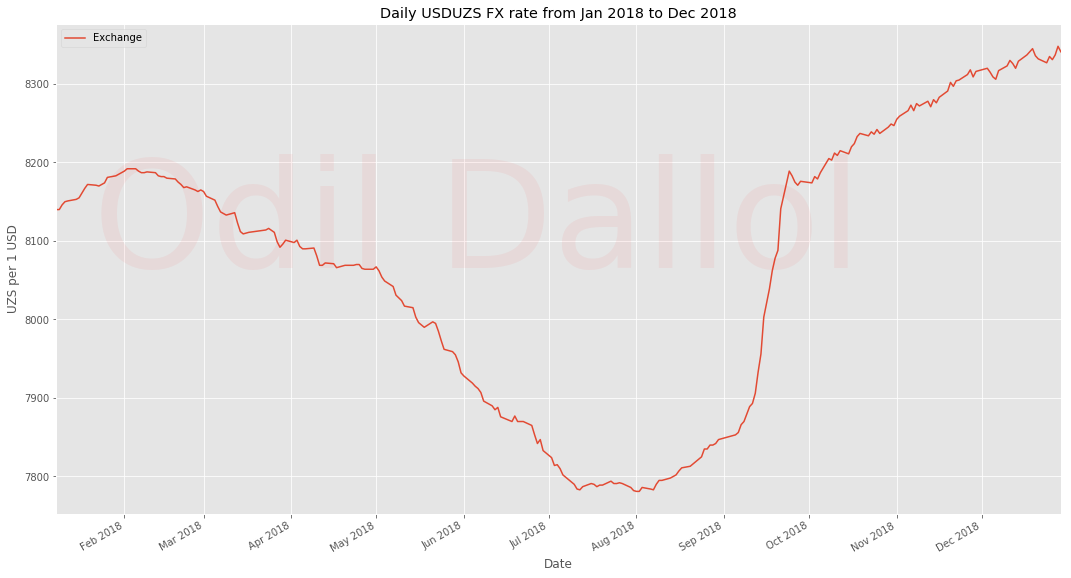

In [27]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

#set ggplot style
plt.style.use('ggplot')

#plot data
fig, ax = plt.subplots(figsize = (18, 10))
FX.plot(ax = ax)

#set ticks every month
ax.xaxis.set_major_locator(mdates.MonthLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.legend(loc = 'upper left')

ax.set_title('Daily USDUZS FX rate from Jan 2018 to Dec 2018')
ax.set_ylabel('UZS per 1 USD')
ax.set_xlabel('Date')

# position bottom right
fig.text(0.45, 0.7, 'Odil Dallol',
         fontsize = 150, color ='red',
         ha='center', va='top', alpha = 0.05)

In [28]:
import numpy as np
FX['log_ret'] = np.log(FX.Exchange) - np.log(FX.Exchange.shift(1))
FX.head()

,Exchange,log_ret
Created_At,,
2018-01-08,8140.0,NaN
2018-01-09,8140.0,0.000000
2018-01-10,8146.0,0.000737
2018-01-11,8150.0,0.000491
2018-01-12,8151.0,0.000123


In [34]:
np.nanstd(FX.log_ret) * 248 ** 0.5

0.017294251074331277

In [35]:
np.nanstd(FX.log_ret)

0.0010981860414066265

In [36]:
np.nanmean(FX.log_ret)

9.8756814757186253e-05